In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
df_wine = pd.read_csv('WineQT.csv')
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [5]:
df_wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

<Axes: xlabel='quality', ylabel='count'>

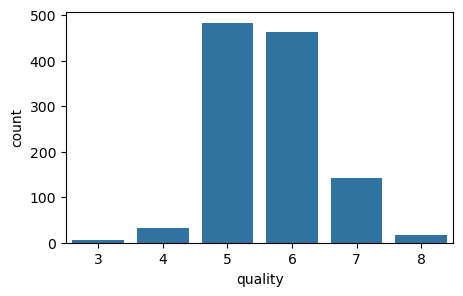

In [9]:
plt.figure(figsize = (5, 3))
sns.countplot(x = 'quality', data = df_wine)

### Feature Selection

In [10]:
x = df_wine[list(df_wine.columns)[0:-2]]

In [11]:
y = df_wine['quality']

### Data Splitting

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state=101)

In [13]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(914, 11)
(914,)
(229, 11)
(229,)


### Model Training

Accuracy of Logistic Regression: 64.63
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         6
           5       0.72      0.84      0.77       102
           6       0.58      0.66      0.62        91
           7       0.40      0.07      0.12        27
           8       0.00      0.00      0.00         2

    accuracy                           0.65       229
   macro avg       0.28      0.26      0.25       229
weighted avg       0.60      0.65      0.60       229



<Axes: >

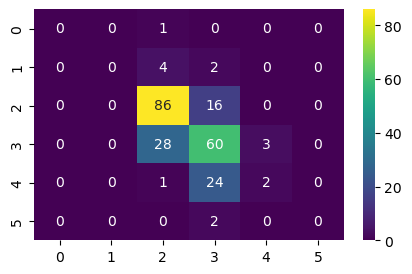

In [16]:
# Logistic Regression
model1 = LogisticRegression()
model1.fit(x_train, y_train)
pred = model1.predict(x_test)
accuracy = round(accuracy_score(y_test, pred) * 100, 2)
print(f'Accuracy of Logistic Regression: {accuracy}')
print(classification_report(y_test, pred))
plt.figure(figsize = (5, 3))
sns.heatmap(confusion_matrix(y_test, pred), annot = True, fmt = '', cmap = 'viridis')

Accuracy of Decision Tree: 63.32
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.33      0.33      0.33         6
           5       0.72      0.72      0.72       102
           6       0.59      0.57      0.58        91
           7       0.61      0.63      0.62        27
           8       0.20      0.50      0.29         2

    accuracy                           0.63       229
   macro avg       0.41      0.46      0.42       229
weighted avg       0.64      0.63      0.64       229



<Axes: >

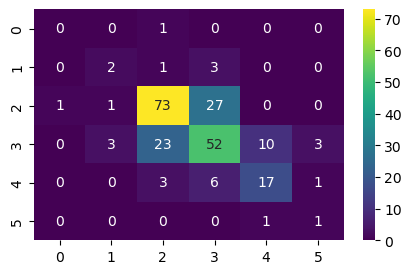

In [17]:
# Decision Tree
model2 = DecisionTreeClassifier()
model2.fit(x_train, y_train)
pred = model2.predict(x_test)
accuracy = round(accuracy_score(y_test, pred) * 100, 2)
print(f'Accuracy of Decision Tree: {accuracy}')
print(classification_report(y_test, pred))
plt.figure(figsize = (5, 3))
sns.heatmap(confusion_matrix(y_test, pred), annot = True, fmt = '', cmap = 'viridis')

Accuracy of Support Vector: 50.66
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         6
           5       0.64      0.42      0.51       102
           6       0.45      0.80      0.58        91
           7       0.00      0.00      0.00        27
           8       0.00      0.00      0.00         2

    accuracy                           0.51       229
   macro avg       0.18      0.20      0.18       229
weighted avg       0.46      0.51      0.46       229



<Axes: >

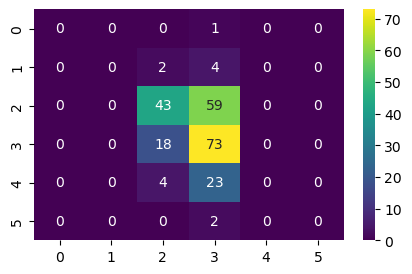

In [18]:
# Support Vector
model3 = SVC()
model3.fit(x_train, y_train)
pred = model3.predict(x_test)
accuracy = round(accuracy_score(y_test, pred) * 100, 2)
print(f'Accuracy of Support Vector: {accuracy}')
print(classification_report(y_test, pred))
plt.figure(figsize = (5, 3))
sns.heatmap(confusion_matrix(y_test, pred), annot = True, fmt = '', cmap = 'viridis')

Accuracy of Support Vector: 69.0
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         6
           5       0.77      0.75      0.76       102
           6       0.62      0.75      0.68        91
           7       0.63      0.44      0.52        27
           8       1.00      0.50      0.67         2

    accuracy                           0.69       229
   macro avg       0.50      0.41      0.44       229
weighted avg       0.67      0.69      0.68       229



<Axes: >

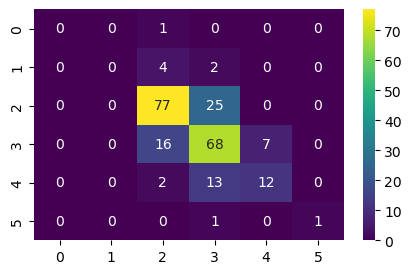

In [19]:
# Random Forest
model4 = RandomForestClassifier()
model4.fit(x_train, y_train)
pred = model4.predict(x_test)
accuracy = round(accuracy_score(y_test, pred) * 100, 2)
print(f'Accuracy of Support Vector: {accuracy}')
print(classification_report(y_test, pred))
plt.figure(figsize = (5, 3))
sns.heatmap(confusion_matrix(y_test, pred), annot = True, fmt = '', cmap = 'viridis')